In [237]:
import sys
sys.path.append("/Users/maithoma/work/github/stackPerf/analysis")
try:
    reload(stackLib)
except:
    import stackLib
    
from stackLib import *
%matplotlib inline

In [86]:
fig_width_pt = 420.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0 / 72.27  # Convert pt to inch
golden_mean = (np.sqrt(5) - 1.0) / 2.0  # Aesthetic ratio
fig_width = fig_width_pt * inches_per_pt  # width in inches
fig_height = fig_width  # *golden_mean      # height in inches
fig_size = [fig_width, fig_height]

params = {'backend': 'ps',
          'axes.labelsize': 25,
          'text.fontsize': 32,
          'legend.fontsize': 14,
          'title.fontsize': 20,
          'xtick.labelsize': 20,
          'ytick.labelsize': 20,
          'text.usetex': False,
          'figure.figsize': fig_size}
pl.rcParams.update(params)

In [344]:
api_site_name = "android"
dic = answerCDF(api_site_name)
rank = dic['rank']
score = dic['score']
time = dic['time']/3600.
A = dic['A']
Sa = dic['Sa']
Score = dic['S']

LinregressResult(slope=1.0459730185043408, intercept=-0.054117302455481742, rvalue=0.9908734012326692, pvalue=6.9685409489385876e-19, stderr=0.031817321378607454)


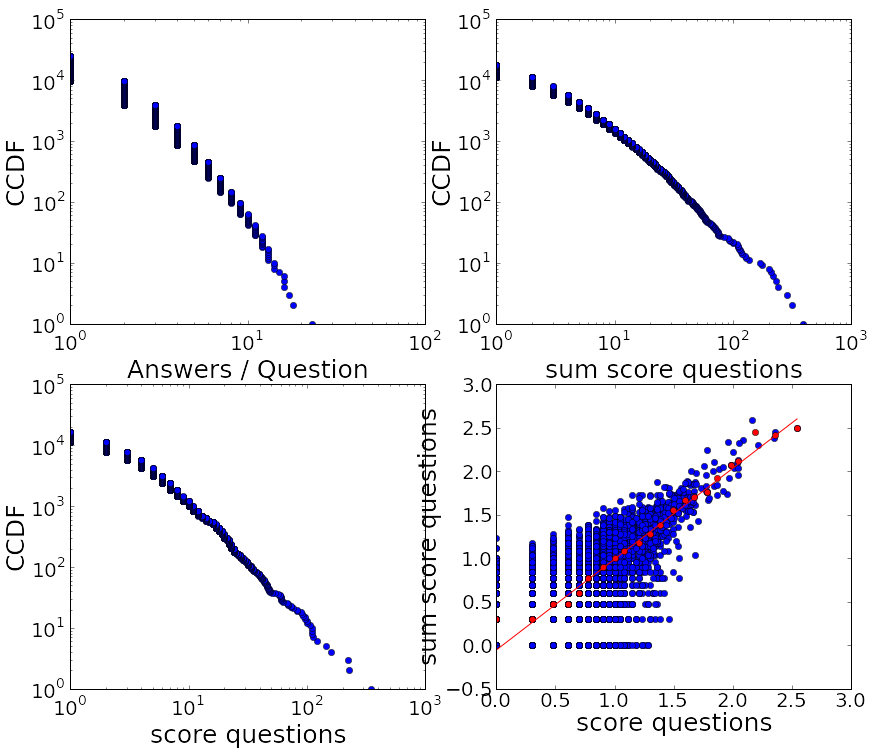

In [345]:
pl.figure(1,(14,12))
pl.subplot(221)
x,y = rankorder(A)
pl.loglog(x,y,'o')
pl.xlabel("Answers / Question")
pl.ylabel("CCDF")

pl.subplot(222)
x,y = rankorder(Sa)
pl.loglog(x,y,'o')
pl.xlabel("sum score questions")
pl.ylabel("CCDF")

pl.subplot(223)
x,y = rankorder(Score)
pl.loglog(x,y,'o')
pl.xlabel("score questions")
pl.ylabel("CCDF")

pl.subplot(224)
lx,ly = logify(Score,Sa)
B = binning(lx,ly,30)
fit = S.linregress(B['bins'],B['mean'])
print fit
pl.plot(lx,ly,'o')
pl.plot(B['bins'],B['median'],'ro')
pl.plot(B['bins'],B['bins']*fit[0]+fit[1],'r-')
pl.xlabel("score questions")
pl.ylabel("sum score questions")

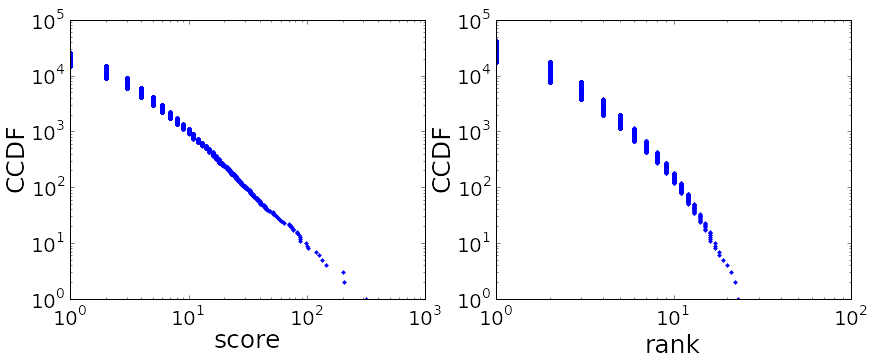

In [346]:
pl.figure(1,(14,5))
pl.subplot(121)
x,y = rankorder(score)
pl.loglog(x,y,'.')
pl.xlabel("score")
pl.ylabel("CCDF")

pl.subplot(122)
x,y = rankorder(rank)
pl.loglog(x,y,'.')
pl.xlabel("rank")
pl.ylabel("CCDF")

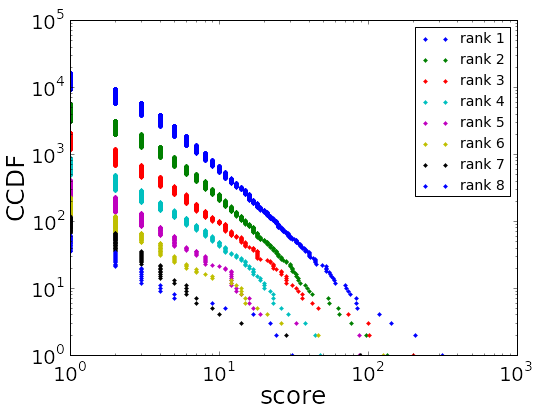

In [347]:
pl.figure(1,(8,6))

for i,r in enumerate(np.sort(np.unique(rank)[:8])):
    c = rank == r
    x,y = rankorder(score[c])
    
    #pl.loglog(x,y/float(y[-1]),'.',label="rank %s"%str(r))
    pl.loglog(x,y,'.',label="rank %s"%str(r))
    
pl.legend(loc=0)
pl.xlabel("score")
pl.ylabel("CCDF")

(0.00027777777777777778, 10000)

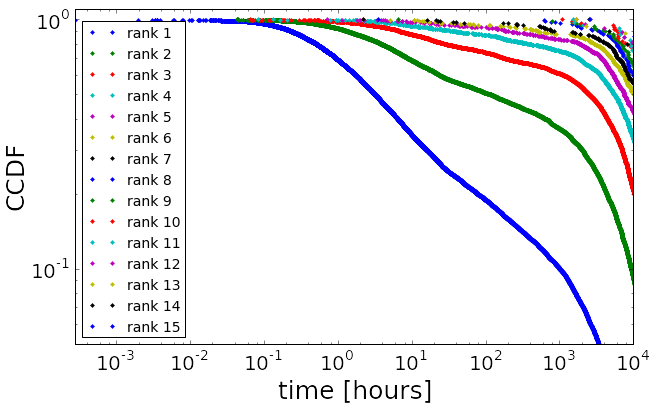

In [348]:
pl.figure(1,(10,6))

for i,r in enumerate(np.sort(np.unique(rank)[:15])):
    c = rank == r
    
    x,y = rankorder(time[c])
    pl.loglog(x,y/float(y[-1]),'.',label="rank %s"%str(r))
    #pl.semilogx(x,y/float(y[-1]),'.',label="rank %s"%str(r))
    
pl.legend(loc=0)
pl.xlabel("time [hours]")
pl.ylabel("CCDF")
pl.ylim(0.05,1.1)
pl.xlim(0.,10000)

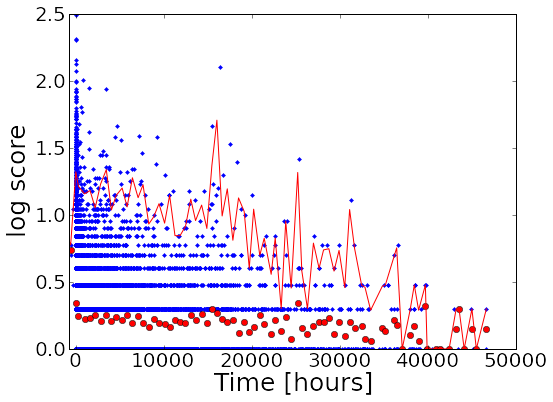

In [349]:
pl.figure(1,(8,6))
c = score > 0
x = time[c]
ly = np.log10(score[c])
pl.plot(x,ly,'.')
B = binning(x,ly,100,confinter=1)
pl.plot(B['bins'],B['mean'],'ro')
pl.plot(B['bins'],B['percUp'],'r-')
pl.xlim(xmin=-24*30)
pl.xlabel("Time [hours]")
pl.ylabel("log score")

LinregressResult(slope=-0.046148979291179781, intercept=0.36933260790518274, rvalue=-0.96018584743271962, pvalue=2.3394033857956075e-15, stderr=0.0026853701550282653)
LinregressResult(slope=-0.07020687742137828, intercept=1.3391451398505876, rvalue=-0.78100768860219849, pvalue=1.5306657767102873e-06, stderr=0.011227981145662216)


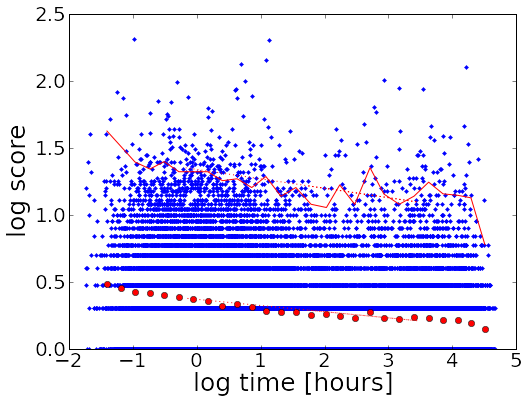

In [355]:
pl.figure(1,(8,6))

c = time > 1/60.

lx,ly = logify(time[c],score[c])
B = binning(lx,ly,30,confinter=1)
fit50 = S.linregress(B['bins'],B['mean'])
print fit50
fit95 = S.linregress(B['bins'],B['percUp'])
print fit95

pl.plot(lx,ly,'.')
pl.plot(B['bins'],B['mean'],'ro')
pl.plot(B['bins'],B['percUp'],'r-')
pl.plot(lx,lx*fit50[0]+ fit50[1],'r:')
pl.plot(lx,lx*fit95[0]+ fit95[1],'r:')

pl.xlabel("log time [hours]")
pl.ylabel("log score")
#pl.xlim(xmin= np.log10(1./60))

LinregressResult(slope=-1.0802267464049511, intercept=3.1177148407750912, rvalue=-0.94091097900761367, pvalue=0.0015788210124099904, stderr=0.17387518036492347)


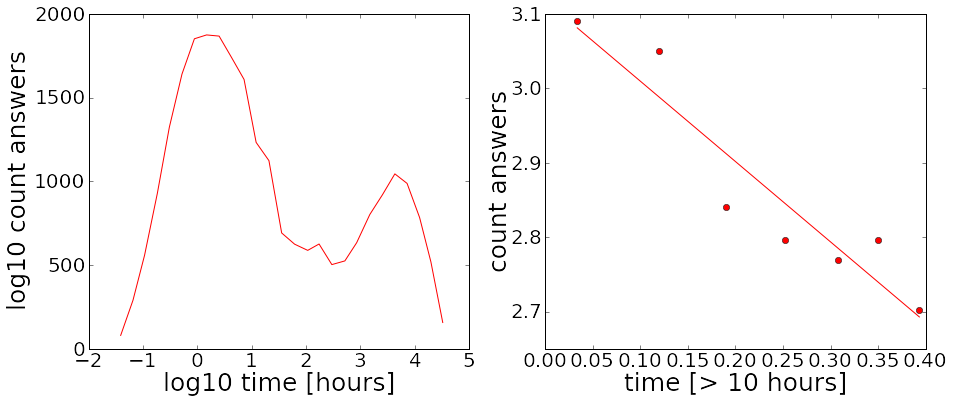

In [358]:
pl.figure(1,(15,6))
pl.subplot(121)
pl.plot(B['bins'],B['nPoints'],'r-')
pl.xlabel("log10 time [hours]")
pl.ylabel("log10 count answers")

pl.subplot(122)
x = B['bins']
y = B['nPoints']

c = (x > 1)*(x < 2.5)
lx,ly = logify(x[c],y[c])
fit = S.linregress(lx,ly)
print fit
pl.plot(lx,ly,'ro')
pl.plot(lx,lx*fit[0]+fit[1],'r-')
pl.xlabel("time [> 10 hours]")
pl.ylabel("count answers")

1
median:  -0.0680501197313 0.00915415019689
95th perc.:  -0.102739612779 0.0112760131154
2
median:  -0.0722443889763 0.0140862424853
95th perc.:  -0.0527354922775 0.0237394044713
3
median:  -0.09972984058 0.0304059403375
95th perc.:  0.0333515100459 0.0389361666198
4
median:  -0.0686068740314 0.0515195374135
95th perc.:  0.0618698043261 0.0774497005205
5
median:  -0.0179354289987 0.0486180497302
95th perc.:  0.138026946524 0.0877401666797


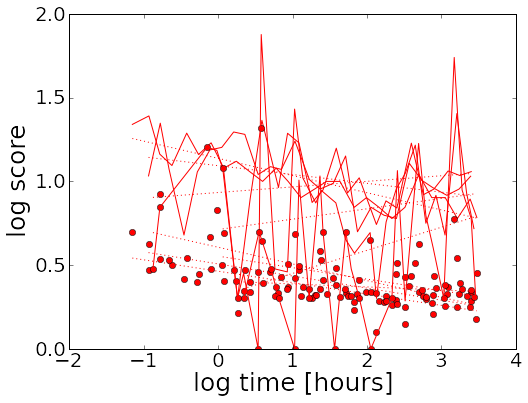

In [352]:
pl.figure(1,(8,6))


for i,r in enumerate(np.sort(np.unique(rank)[:5])):
    print r
    c = (rank > r)*(time > 1/60.)*(time < 3000.)
    lx,ly = logify(time[c],score[c])
    B = binning(lx,ly,30,confinter=5)
    fit50 = S.linregress(B['bins'],B['mean'])
    print "median: ",fit50[0],fit50[-1]
    fit95 = S.linregress(B['bins'],B['percUp'])
    print "95th perc.: ",fit95[0],fit95[-1]

    #pl.plot(lx,ly,'.')
    pl.plot(B['bins'],B['mean'],'ro')
    pl.plot(B['bins'],B['percUp'],'r-')
    pl.plot(B['bins'],B['bins']*fit50[0]+ fit50[1],'r:')
    pl.plot(B['bins'],B['bins']*fit95[0]+ fit95[1],'r:')

pl.xlabel("log time [hours]")
pl.ylabel("log score")
#pl.xlim(xmin= np.log10(1./60))

### Some thoughts
If an (first) answer is given late, 2 possibilities:
* no interest
* hard / mis-formulated problem
